#  Mercedes-Benz Analysis


In [1]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("merc.csv")

In [4]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [5]:
data.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0
13118,S Class,2019,54999,Automatic,2075,Diesel,145,52.3,2.9


In [31]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [7]:
data.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


**Distribution of Car Price**

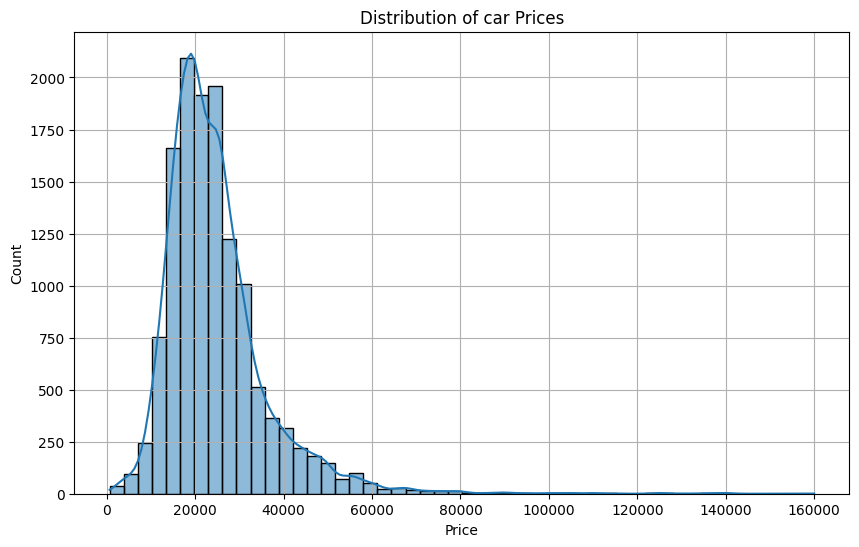

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.histplot(data['price'],bins=50,kde=True)
plt.title('Distribution of car Prices')
plt.xlabel('Price')
plt.grid(True)
plt.show()


**Correlation Heatmap**

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


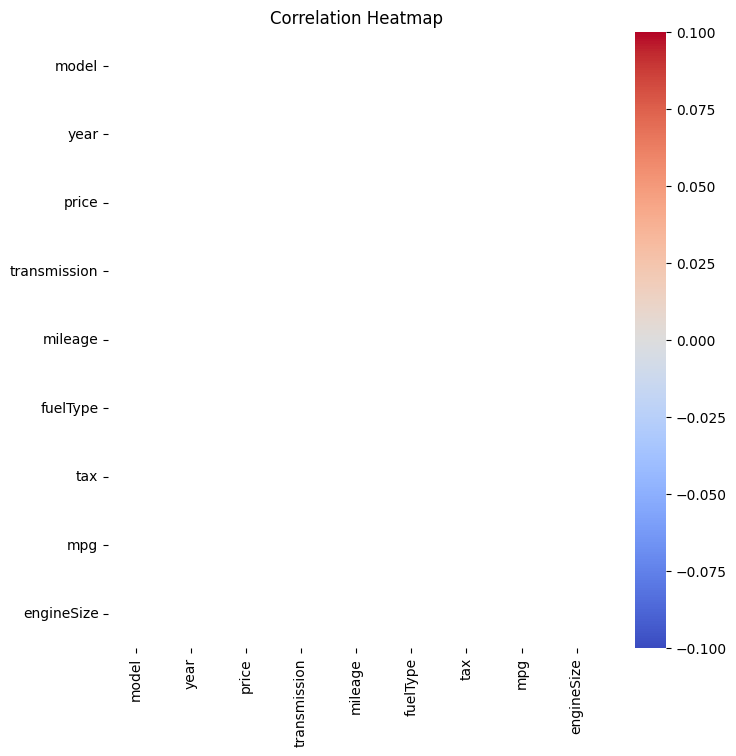

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
non_numeric_cols = data.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    try:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    except:
        print(f"Could not convert column {col} to numeric.")
data_numeric = data.dropna()
plt.figure(figsize=(8,8))
sns.heatmap(data_numeric.corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Scatter Plot: Year vs Price**

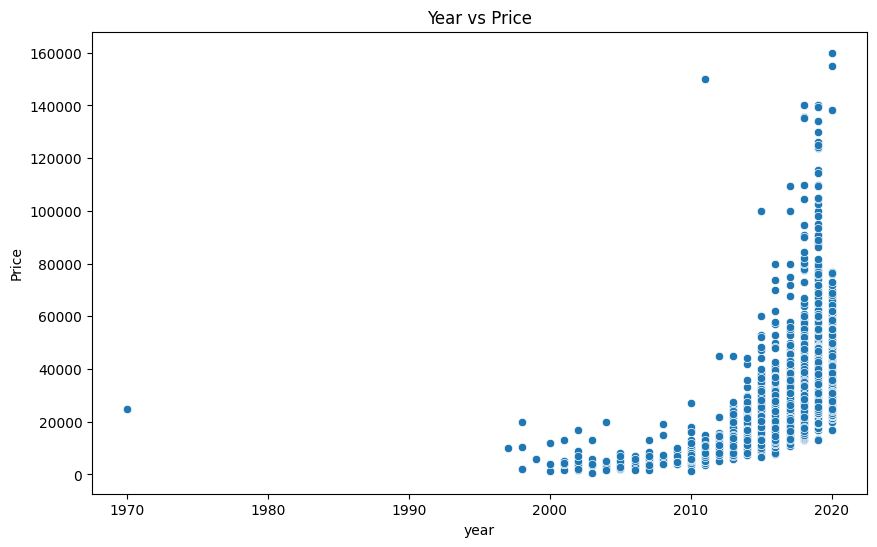

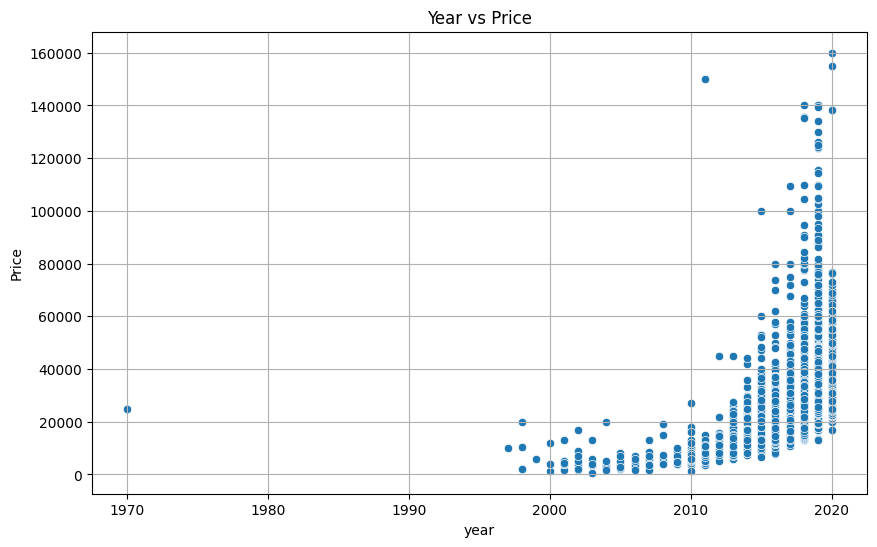

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='year',y='price',data=data)
plt.title('Year vs Price')
plt.xlabel('year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

**Boxplot: Price by Fuel Type**

**Basic Summary Statistics**

In [10]:
average_price=data['price'].mean()
min_price=data['price'].min()
max_price=data['price'].max()

print(f"Average Price:${average_price:.2f}")
print(f"Minimum Price:${min_price:.2f}")
print(f"Maximum Price:${max_price:.2f}")

Average Price:$24698.60
Minimum Price:$650.00
Maximum Price:$159999.00


**Top 5 Most Expensive Cars**

In [16]:
top_5_expensive=data[['model','year','price',]].sort_values(by='price',ascending=False).head(5)
top_5_expensive

,model,year,price
6199,G Class,2020,159999
10044,G Class,2020,154998
5,SL CLASS,2011,149948
8737,A Class,2019,140319
6386,G Class,2018,139995


<ipython-input-15-8c99203553c2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(top_5_expensive, x='year', y='model', inner='stick', palette='Dark2')


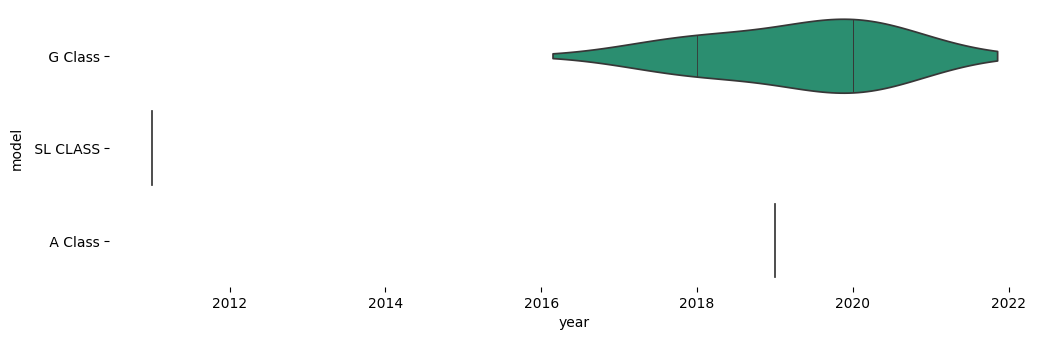

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(top_5_expensive['model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(top_5_expensive, x='year', y='model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Count of Cars by Fuel Type**

In [17]:
fuel_type_counts=data['fuelType'].value_counts()
fuel_type_counts

,count
fuelType,
Diesel,9187
Petrol,3752
Hybrid,173
Other,7


**Average Price by Transmission Type**

In [18]:
avg_price_by_transmission=data.groupby('transmission')['price'].mean().reset_index()
avg_price_by_transmission

,transmission,price
0,Automatic,24406.959585
1,Manual,15442.434903
2,Other,15847.500000
3,Semi-Auto,26858.461157


**Average Mileage by year**

In [19]:
avg_mileage_by_year=data.groupby('year')['mileage'].mean().reset_index()
avg_mileage_by_year

,year,mileage
0,1970,14000.000000
1,1997,76000.000000
2,1998,76347.750000
3,1999,34000.000000
4,2000,89648.666667
5,2001,72955.100000
6,2002,57391.111111
7,2003,88777.714286
8,2004,94363.461538
9,2005,80651.333333


**Cars with Engine Size is Greater than 3.0L**

In [20]:
cars_with_large_engines=data[data['engineSize']>3.0]
cars_with_large_engines

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
7,S Class,2012,10948,Automatic,107000,Petrol,265,36.7,3.5
...,...,...,...,...,...,...,...,...,...
13002,GLE Class,2018,66974,Automatic,16592,Petrol,145,23.7,5.5
13036,SL CLASS,2000,11750,Automatic,68709,Petrol,270,24.6,3.2
13038,C Class,2020,68995,Automatic,2000,Petrol,145,28.0,4.0
13058,S Class,2015,51990,Automatic,23156,Petrol,555,28.0,5.5


**Average Price of Cars by Fuel Type and Transmission**

In [22]:
trand=data.groupby(['fuelType','transmission'])['price'].mean().reset_index()
trand

,fuelType,transmission,price
0,Diesel,Automatic,22902.562607
1,Diesel,Manual,14139.761146
2,Diesel,Other,12995.000000
3,Diesel,Semi-Auto,25365.094395
4,Hybrid,Automatic,21260.788462
5,Hybrid,Semi-Auto,25851.014493
6,Other,Automatic,22539.833333
7,Other,Other,18700.000000
8,Petrol,Automatic,29009.083813
9,Petrol,Manual,17886.894422


**Total Number of Cars for Each Model**

In [23]:
car_count=data['model'].value_counts().reset_index()
car_count

,model,count
0,C Class,3747
1,A Class,2561
2,E Class,1953
3,GLC Class,960
4,GLA Class,847
5,B Class,591
6,CL Class,511
7,GLE Class,461
8,SL CLASS,260
9,CLS Class,237


In [24]:
import altair as alt
alt.Chart(car_count).mark_bar().encode(
    x='model',
    y='count'
)


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

**Data Preprocessing for Machine Learning**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x=data.drop(columns=['price','model'])
x=pd.get_dummies(x,drop_first=True)
y=data['price'] #target variable
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

**Train a Machine Learning Model(Random Forest regressor)**

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
model=RandomForestRegressor(random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mean=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred)
print(f"Mean Absolute Error(MAE):{mean:.2f}")
print(f"Root Mean Squared Error(RMSE):{rmse:.2f}")
print(f"R-squared(R^2):{r2:.4f}")


Mean Absolute Error(MAE):2066.02
Root Mean Squared Error(RMSE):3925.80
R-squared(R^2):0.9013


**Feature Importance**

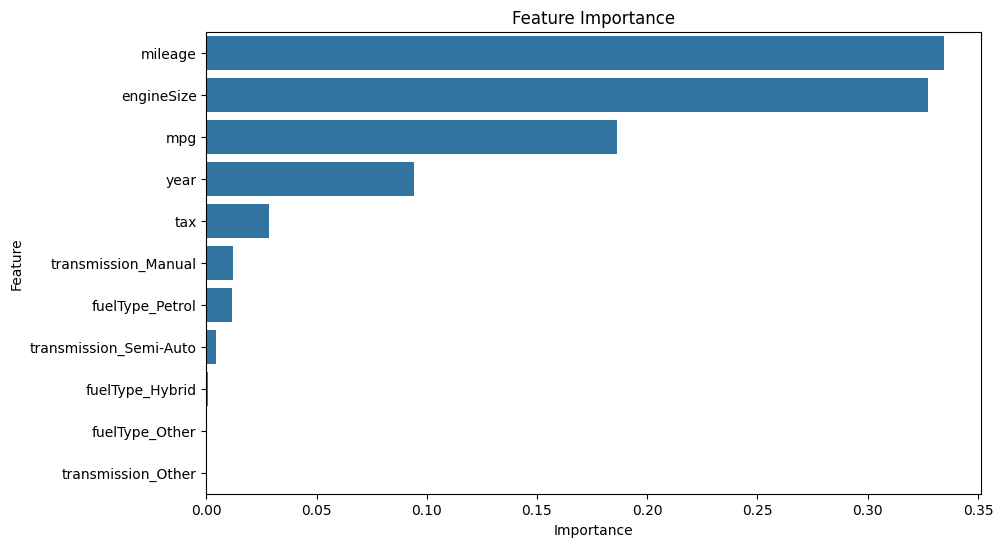

In [42]:
importance=model.feature_importances_
feature_name=x.columns
feature_importance_df=pd.DataFrame({'Feature':feature_name,'Importance':importance})
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)
#plotting feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


**Prediction on New Data**

In [44]:
new_data = pd.DataFrame({
    'year': [2024],
    'mileage': [10000],
    'tax': [150],
    'mpg': [50.0],
    'engineSize': [2.0],
    'transmission_Manual': [0],
    'transmission_Other': [0], # Add missing columns
    'transmission_Semi-Auto': [0],
    'fuelType_Hybrid': [0],  # Adjust column names to match training data
    'fuelType_Other': [0],
    'fuelType_Petrol': [1]
})
new_data_scaled = scaler.transform(new_data)
predicted_price = model.predict(new_data_scaled)
print(f"Predicted Price: ${predicted_price[0]:.2f}")

Predicted Price: $18920.47


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
